**PyTorch WorkFlow Fundamentals:**

If you ever stuck, don't forget to check the tutorail:
https://www.learnpytorch.io/01_pytorch_workflow/

- Importing libraries

In [ ]:
import torch
from torch import nn
# nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
print(f"PyTorch version: {torch.__version__}")

PyTorch version: 2.6.0+cpu


- Squeeze and Unsqueeze

In [53]:
# remove only when size is 1
x = torch.randn(2, 1, 3)
print(f"Before: {x.shape}")
y = x.squeeze(dim=1)
print(f"After: {y.shape}")

Before: torch.Size([2, 1, 3])
After: torch.Size([2, 3])


In [ ]:
# if there is no dimension of 1 squeeze do nothing
x = torch.randn(3, 5, 4)
print(f"Before: {x.shape}")
y = x.squeeze(dim = 1) # dim=1 has size 5 → nothing happens
print(f"After: {y.shape}")

Before: torch.Size([3, 5, 4])
After: torch.Size([3, 5, 4])


In [55]:
# if no dim is passed then all the dimension with 1 will be removed
x = torch.randn(1, 4, 5, 1, 6, 1)
print(f"Before : {x.shape}")

y = x.squeeze()
print(f"After : {y.shape}")

Before : torch.Size([1, 4, 5, 1, 6, 1])
After : torch.Size([4, 5, 6])


In [ ]:
x = torch.tensor([[1, 2], [3, 4]]) # 2D tensor
# Unsqueezing x
x_unsqueezed = x.unsqueeze(dim = 0)
# Squeezing x_unsqueezed
x_squeezed = x_unsqueezed.squeeze(dim = 0)
print(f"Dimension before unsqueezing: {x.shape}")
print(f"Dimension after unsqueezing : {x_unsqueezed.shape}")
print(f"Dimension after squeezing   : {x_squeezed.shape}")

print(f"x before unsqueezing: \n{x}")
print(f"x after unsqueezing : \n{x_unsqueezed}")
print(f"x after squeezing   : \n{x_squeezed}")

Dimension before unsqueezing: torch.Size([2, 2])
Dimension after unsqueezing : torch.Size([1, 2, 2])
Dimension after squeezing   : torch.Size([2, 2])
x before unsqueezing: 
tensor([[1, 2],
        [3, 4]])
x after unsqueezing : 
tensor([[[1, 2],
         [3, 4]]])
x after squeezing   : 
tensor([[1, 2],
        [3, 4]])


In [ ]:
x = torch.tensor([[1, 2], [3, 4]]) # 2D tensor
# Unsqueezing x
x_unsqueezed = x.unsqueeze(dim = 1)
# Squeezing x_unsqueezed
x_squeezed = x_unsqueezed.squeeze()
print(f"Dimension before unsqueezing: {x.shape}")
print(f"Dimension after unsqueezing : {x_unsqueezed.shape}")
print(f"Dimension after squeezing   : {x_squeezed.shape}")

print(f"x before unsqueezing: \n{x}")
print(f"x after unsqueezing : \n{x_unsqueezed}")
print(f"x after squeezing   : \n{x_squeezed}")

Dimension before unsqueezing: torch.Size([2, 2])
Dimension after unsqueezing : torch.Size([2, 1, 2])
Dimension after squeezing   : torch.Size([2, 2])
x before unsqueezing: 
tensor([[1, 2],
        [3, 4]])
x after unsqueezing : 
tensor([[[1, 2]],

        [[3, 4]]])
x after squeezing   : 
tensor([[1, 2],
        [3, 4]])


In [ ]:
x = torch.tensor([[1, 2], [3, 4]]) # 2D tensor
# Unsqueezing x
x_unsqueezed = x.unsqueeze(dim = 2)
# Squeezing x_unsqueezed
x_squeezed = x_unsqueezed.squeeze()
print(f"Dimension before unsqueezing: {x.shape}")
print(f"Dimension after unsqueezing : {x_unsqueezed.shape}")
print(f"Dimension after squeezing   : {x_squeezed.shape}")

print(f"x before unsqueezing: \n{x}")
print(f"x after unsqueezing : \n{x_unsqueezed}")
print(f"x after squeezing   : \n{x_squeezed}")

Dimension before unsqueezing: torch.Size([2, 2])
Dimension after unsqueezing : torch.Size([2, 2, 1])
Dimension after squeezing   : torch.Size([2, 2])
x before unsqueezing: 
tensor([[1, 2],
        [3, 4]])
x after unsqueezing : 
tensor([[[1],
         [2]],

        [[3],
         [4]]])
x after squeezing   : 
tensor([[1, 2],
        [3, 4]])


**1. Data (prepare and loading)**

In [ ]:
# Create known parameters
weight = 0.7
bias = 0.3

# Create data
start = 0.0
end = 1.0
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias # Actual value
print("Size of X: ", X.shape)

Size of X:  torch.Size([50, 1])


In [60]:
v = torch.rand(5, 3)
v[:3]

tensor([[0.0026, 0.8346, 0.8788],
        [0.6822, 0.1514, 0.0065],
        [0.0939, 0.8729, 0.7401]])

- Split data into training and testing set 

In [61]:
train_split = int(0.8 * len(X))
X_train, y_train  = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train),  len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_predictions(X_train, y_train,X_test,
                     y_test, predictions=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(X_train, y_train, c='b',s=10, label="Training Data")
    plt.scatter(X_test, y_test, c= 'g', s = 10, label = "Testing data")
    if predictions is not None:
        plt.scatter(X_test, predictions, c = 'r', s=10, label = "Predictions")
    # Change size + weight
    plt.legend(prop={"size": 14, "weight": "bold"})
    plt.show()

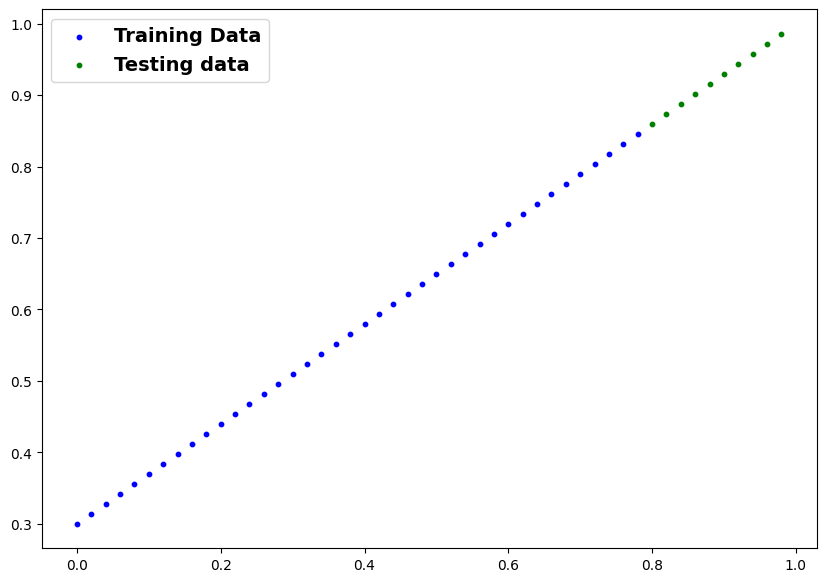

In [63]:
plot_predictions(X_train, y_train, X_test, y_test)

**2. Building Model** 

In [ ]:
# Create a liner regression model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__() # this calls the constructor of nn.Module
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad = True)
        self.bias = nn.Parameter(torch.rand(1, dtype=torch.float), requires_grad=True)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights*x + self.bias

In [65]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.3904], requires_grad=True)]

In [66]:
model_0.parameters()

<generator object Module.parameters at 0x000002B03C82D8C0>

In [67]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.3904]))])

In [68]:
# lets predict using inference_mode()
with torch.inference_mode():
    y_preds = model_0(X_test)

In [ ]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n {y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
 tensor([[0.6598],
        [0.6665],
        [0.6733],
        [0.6800],
        [0.6867],
        [0.6935],
        [0.7002],
        [0.7069],
        [0.7137],
        [0.7204]])


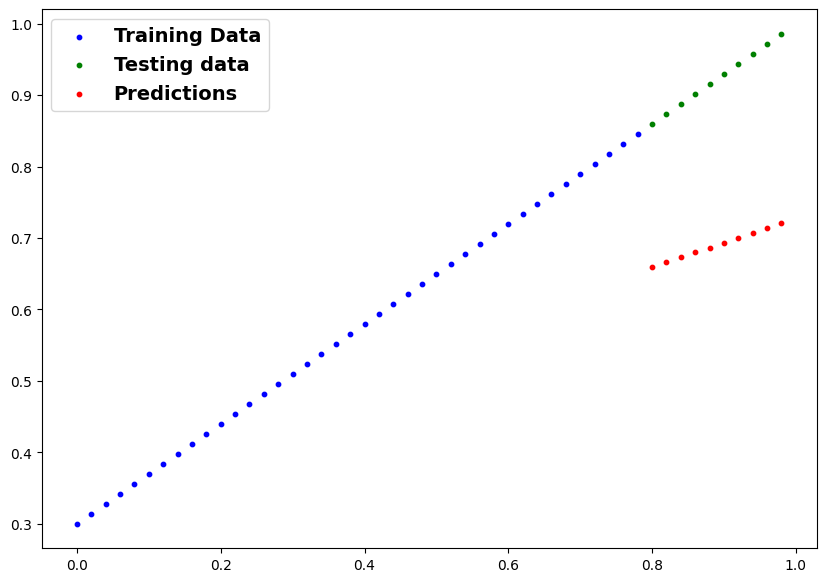

In [70]:
plot_predictions(X_train, y_train, X_test, y_test, predictions=y_preds)

In [71]:
print(f"Errors: \n{y_test - y_preds}")

Errors: 
tensor([[0.2002],
        [0.2075],
        [0.2147],
        [0.2220],
        [0.2293],
        [0.2365],
        [0.2438],
        [0.2511],
        [0.2583],
        [0.2656]])


**3. Train Model:**

In [ ]:
# Create the loss function
loss_fn = nn.L1Loss()  # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr = 0.01)

In [ ]:
torch.manual_seed(42)

epochs = 100

# create empty list to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):

    ### Training

    # put the model in training mode
    model_0.train()

    # 1. Forward pass on train data using the forward method
    y_pred = model_0(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad
    optimizer.zero_grad()

    # 4. loss backwards
    loss.backward()

    # 5.Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in the evaluation mode
    model_0.eval()

    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, y_test.type(torch.float))

        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss:.4} | MAE Test Loss: {test_loss:.4}")

Epoch: 0 | MAE Train Loss: 0.0817 | MAE Test Loss: 0.2266
Epoch: 10 | MAE Train Loss: 0.06808 | MAE Test Loss: 0.1807
Epoch: 20 | MAE Train Loss: 0.06258 | MAE Test Loss: 0.1563
Epoch: 30 | MAE Train Loss: 0.05879 | MAE Test Loss: 0.1419
Epoch: 40 | MAE Train Loss: 0.0553 | MAE Test Loss: 0.1308
Epoch: 50 | MAE Train Loss: 0.05182 | MAE Test Loss: 0.1205
Epoch: 60 | MAE Train Loss: 0.04839 | MAE Test Loss: 0.1122
Epoch: 70 | MAE Train Loss: 0.04495 | MAE Test Loss: 0.1046
Epoch: 80 | MAE Train Loss: 0.04152 | MAE Test Loss: 0.09638
Epoch: 90 | MAE Train Loss: 0.03808 | MAE Test Loss: 0.0881


```python
y_pred = model_0(X_train)
```

**instead of**:

```python
y_pred = model_0.forward(X_train)
```

---

**What’s happening under the hood?**

* In PyTorch, `model_0` is an instance of a class that inherits from `torch.nn.Module`.

* When you call `model_0(X_train)`, Python internally calls the `__call__` method of the model.

* The `__call__` method in `torch.nn.Module` does some important things **before and after** calling `forward()`:

  1. Runs registered hooks (like forward hooks).
  2. Handles pre- and post-processing.
  3. Calls your `forward()` method.
  4. Manages things like `training` mode flags and hooks.

* If you call `model_0.forward(X_train)` directly, you **bypass** all this extra functionality.

---

**Why is this important?**

* Using `model_0(X_train)` ensures that everything PyTorch needs to do internally happens correctly.
* It keeps your model compatible with features like hooks, proper tracking, and modules behavior.
* It’s considered the **correct and recommended way** to get output from your model.

---

**Summary:**

| Calling Method             | What happens                                                    | Recommended?           |
| -------------------------- | --------------------------------------------------------------- | ---------------------- |
| `model_0(X_train)`         | Calls `__call__`, which calls `forward()` + hooks + extra stuff | ✅ Yes (recommended)    |
| `model_0.forward(X_train)` | Calls `forward()` directly, skips hooks and other internals     | ❌ No (not recommended) |

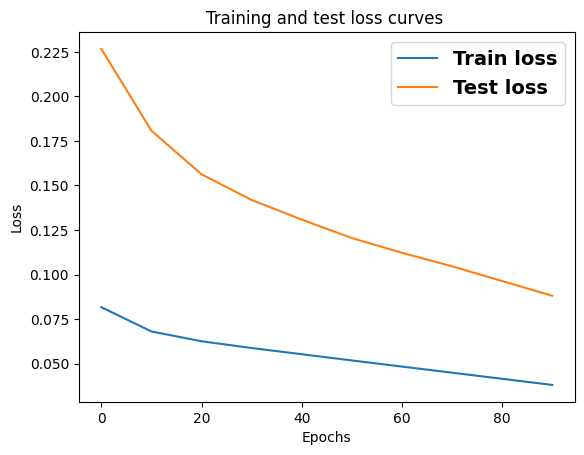

In [ ]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves ")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(prop={"size" : 14, "weight" : "bold"})

**4. Making predictions:**

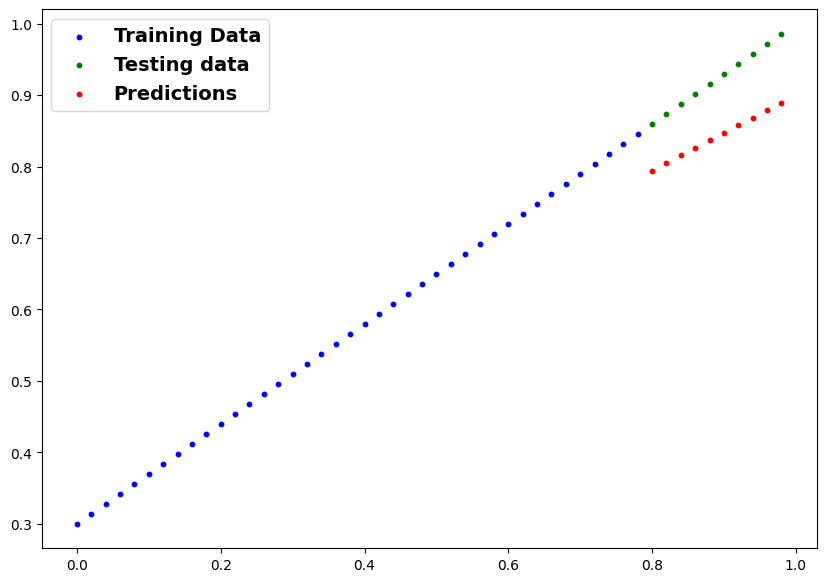

In [ ]:
# 1. set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
    y_preds = model_0(X_test)

plot_predictions(X_train, y_train, X_test, y_test, predictions=y_preds)

**5. Save model:**

**6. Putting it all together:**

In [ ]:
# Importing libraries
import torch
from torch import nn
import matplotlib.pyplot as plt

print(f"PyTorch version I'm using: {torch.__version__}")

PyTorch version I'm using: 2.6.0+cpu


In [3]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


In [ ]:
# Setup device agnostic code
if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"

print(f"Using device: {device}")

Using device: cpu


In [ ]:
# Create weight and bias
weight = 0.7
bias = 0.3

# Create range values
start = 0.0
end = 1.0
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias
print(f"Training examples: \n{X[:5]}")
print(f"Training labels: \n{y[:5]}")

Training examples: 
tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800]])
Training labels: 
tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560]])


In [ ]:
# Spliting data into train and test
train_split = int(len(X) * 0.80)
X_train, X_test = X[:train_split], X[train_split:]
y_train, y_test = y[:train_split], y[train_split:]
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [ ]:
def plot_predictions(X_train, y_train, X_test,
                     y_test, predictions=None):
    plt.scatter(X_train, y_train, c='b', s=10, label = "Training data")
    plt.scatter(X_test, y_test, c='g', s=10, label="Testing data")
    if predictions is not None:
        plt.scatter(X_test, predictions, c='r', s=10, label="Predictions")

    plt.legend(prop={"size":"14", "weight": "bold"})
    plt.show()

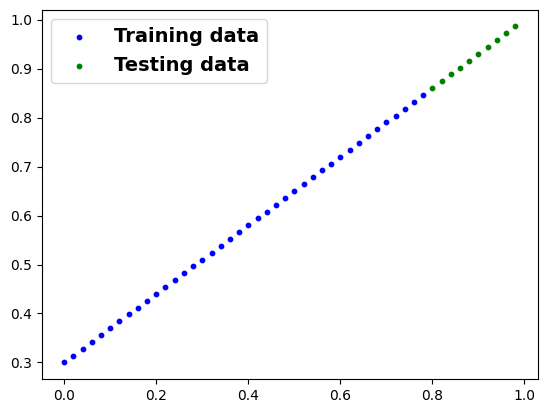

In [12]:
plot_predictions(X_train, y_train, X_test, y_test, None)

In [ ]:
# Building a PyTorch Linear Model
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.Linear_model = nn.Linear(in_features=1,
                                      out_features=1)
        def forward(self, x: torch.Tensor)-> torch.Tensor:
            return self.Linear_model(x)

In [15]:
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (Linear_model): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('Linear_model.weight', tensor([[0.7645]])),
              ('Linear_model.bias', tensor([0.8300]))]))

In [ ]:
# Check model device
next(model_1.parameters()).device

device(type='cpu')

In [17]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
# create loss function
loss_fn = nn.L1Loss()

# create optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr = 0.01)

In [ ]:
torch.manual_seed(42)
epochs = 1000